# DETECTING LACK OF FIT IN SIMPLE LINEAR REGRESSION:

# INFLUENCE OF TRANSISTOR EMITTER DRIVE-IN TIME IN TRANSISTOR GAIN

Transistor gain between emitter and collector in an integrated circuit device (hFE) is related to two variables (Myers, Montgomery and Anderson-Cook, 2009) that can be controlled at the deposition process, emitter drive-in time (x1, in minutes) and emitter dose (x2, in ions × 1014). Fourteen samples were observed following deposition, and the resulting data are shown
in the table below. We will consider linear regression models using gain as the response and emitter drive-in time or emitter dose as the regressor variable.

Two questions are investigated here:

a) Does the emitter drive-in influence gain in a linear relationship ? \
b) Does the emitter dose influence gain in a linear relationship ?

Source: Probability & statistics for engineers & scientists/Ronald E. Walpole

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy.stats import *
import scipy.stats as stats


#Linear regression library
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import r2_score

In [2]:
observacao = [i for i in range(1, 15)]
drive_in_time = [195,255,195,255,255,255,255,195,255,255,255,255,255,340]
dose_ion = [4,4,4.6,4.6,4.2,4.1,4.6,4.3,4.3,4,4.7,4.3,4.72,4.3]
gain = [1004,1636,852,1506,1272,1270,1269,903,1555,1260,1146,1276,1225,1321]

transistor_gain = pd.DataFrame({"Observações": observacao, "Drive-in Time": drive_in_time, "Dose Ion": dose_ion, "gain": gain})
transistor_gain

,Observações,Drive-in Time,Dose Ion,gain
0,1,195,4.00,1004
1,2,255,4.00,1636
2,3,195,4.60,852
3,4,255,4.60,1506
4,5,255,4.20,1272
5,6,255,4.10,1270
6,7,255,4.60,1269
7,8,195,4.30,903
8,9,255,4.30,1555
9,10,255,4.00,1260


In [3]:
transistor_gain.describe()

,Observações,Drive-in Time,Dose Ion,gain
count,14.0000,14.000000,14.000000,14.000000
mean,7.5000,248.214286,4.337143,1249.642857
std,4.1833,36.564334,0.264151,226.237998
min,1.0000,195.000000,4.000000,852.000000
25%,4.2500,255.000000,4.125000,1165.750000
50%,7.5000,255.000000,4.300000,1269.500000
75%,10.7500,255.000000,4.600000,1309.750000
max,14.0000,340.000000,4.720000,1636.000000


# Hypothesis testing

In order to asnwer both questions above, the  hypothesis test will be done on the slope "m" of the regressor variable "x". Let's remember the linear regression equation: \
y = mx + b

where m is the slope of regressor variable;\
      b is the intercept
      
The null Ho e alternative Ha for both questions above are:\

Ho: The emitter parameter does not influence gain in a linear relationship, i.e, m = 0 \
Ha: The emitter parameter influences gain in a linear relationship, i.e, m != 0 (read m is not null) \

where parameter is drive-in time or gain

# Select drive-in time as emitter parameter

In [24]:
x_1 = np.array(transistor_gain['Drive-in Time'])
y_1 = np.array(transistor_gain['gain'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x_1,y_1)
print(slope, intercept, r_value, p_value)

3.7663824103565196 314.7729374293639 0.6087185483433857 0.02087604658117971


In [25]:
if p_value < 0.05:
    print("Reject the Null Hypothesis,.i.e , the emitter drive-in time influences gain in a linear relationship")
else:
    print("Fail to reject the null hypothesis, i.e, the emitter drive-in time does not influence gain in a linear realtionship")

Reject the Null Hypothesis,.i.e , the emitter drive-in time influences gain in a linear relationship


# Select Emitter Gain as the regressor variable

In [26]:
x_2 = np.array(transistor_gain['Dose Ion'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x_2,y_1)
print(slope, intercept, r_value, p_value)

-154.35617991684524 1919.10766032506 -0.18022330920741272 0.5375344615696482


In [27]:
if p_value < 0.05:
    print("Reject the Null Hypothesis,.i.e , the emitter dose influences gain in a linear relationship")
else:
    print("Fail to reject the null hypothesis, i.e, the emitter dose does not influence gain in a linear realtionship")

Fail to reject the null hypothesis, i.e, the emitter dose does not influence gain in a linear realtionship


[[7.42430556]]
[-528.07291667]
-103.9562385003732
-0.06814409208330963


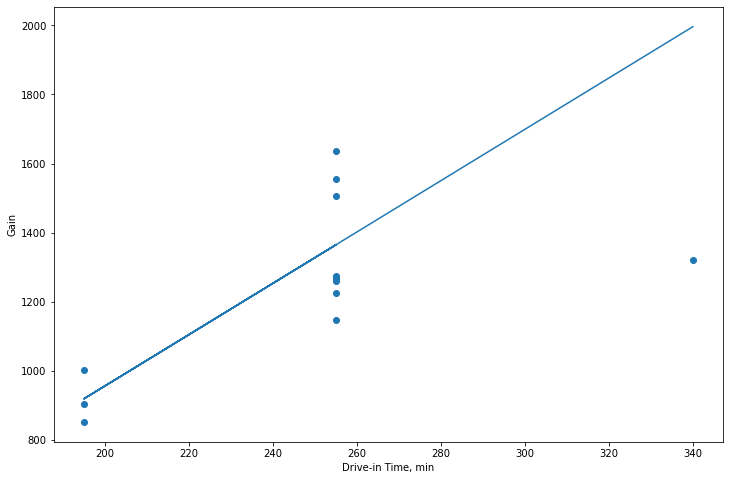

In [14]:
x = transistor_gain[['Drive-in Time']]
y = transistor_gain[['gain']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

transistor_model = LinearRegression()
transistor_model.fit(x_train, y_train)
gain_predict = transistor_model.predict(x)
print(transistor_model.coef_)
print(transistor_model.intercept_)
print(transistor_model.score(x_test, y_test))
print(r2_score(y, gain_predict))

plt.subplots(1,1,figsize=(12,8))
plt.scatter(x, y)
plt.plot(x, gain_predict)
plt.xlabel("Drive-in Time, min")
plt.ylabel("Gain")
plt.show()

[[-208.22714681]]
[2135.22714681]
-3.3845007053156033
0.022060979390252422


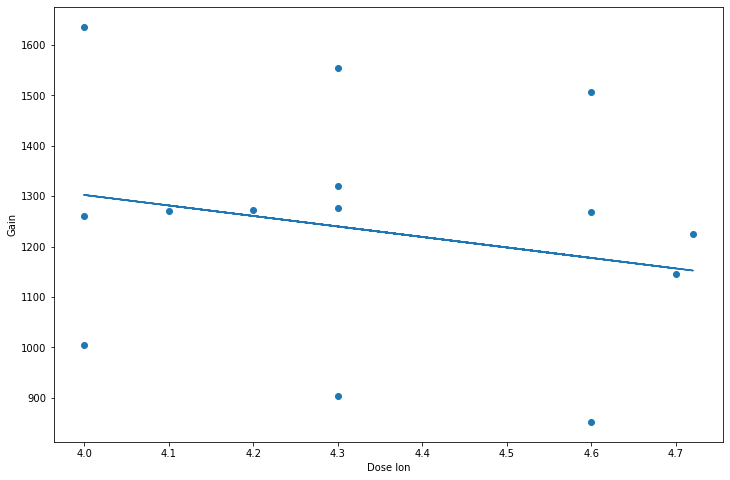

In [18]:
x = transistor_gain[['Dose Ion']]
y = transistor_gain[['gain']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

transistor_model = LinearRegression()
transistor_model.fit(x_train, y_train)
gain_predict = transistor_model.predict(x)
print(transistor_model.coef_)
print(transistor_model.intercept_)
print(transistor_model.score(x_test, y_test))
print(r2_score(y, gain_predict))

plt.subplots(1,1,figsize=(12,8))
plt.scatter(x, y)
plt.plot(x, gain_predict)
plt.xlabel("Dose Ion")
plt.ylabel("Gain")
plt.show()